# Indian Car Analisys

India merupakan salah satu negara terpadat di dunia, tercatat pada tahun 2018 terdapat 1.353 Miliar penduduk India. Dibawah ini merupakan dataset pengguna mobil bekas di india untuk kemudian dilakukan analisa terhasap datasetnya agar mendapatkan insight dari data tersebut. Banyaknya pemilik mobil bekas di India, tentu menghasilkan data yang dapat diolah kedepannya. data ini dapat diolah untuk menghasilkan informasi yang bermanfaat. contohnya seperti pengambilan keputusan, segmentasi pelanggan, sampai kebutuhan prediksi. berikut telah disediakan dataset kepemilikan mobil bekas dibeberapa kota di India. data ini meliputi Nama merk mobil, Tahun edisi mobil, Total jarak pemakaian mobil oleh pengguna sebelumnya, Tipe bahan bakar yang digunakan, Tipe transmisi yang digunakan, Jenis kepemilikan mobil, tingkat konsumsi bahan bakar, kapasitas mesin mobil, tenaga maksimum dari mesin, jumlah kursi pada mobil dan harga satuan mobil dalam satuan INR(Indian Rupee) yang nantinya dapat dianalisa untuk mendapatkan informasi yang berguna. beberapa informasi yang bisa didapatkan seperti: jenis transmisi automatic atau manual yang populer ditiap-tiap kota , tipe bahan bakar yang popular ditiap-tiap kota, merk mobil bekas paling populer, harga mobil bekas berdasarkan tahun keluar dan sebagainya.

Link Dataset : https://www.kaggle.com/avikasliwal/used-cars-price-prediction?select=train-data.csv

In [ ]:
# Import Dataset

import pandas as pd
import matplotlib.pyplot as plt

car_data = pd.read_csv('used_car_data.csv')
df = pd.DataFrame(car_data)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74



###  Exploratory Data Analysis (EDA)


**Mehilat brand mobil apa saja yang ada dalam dataset.**

Jika diperhatikan pada kolom name hanya terdapat tipe mobil contoh Maruti Wagon R LXI CNG, dari nama tersebut mengandung Brand + Tipe, maka ambil brand nya saya yang terdpaat pada awal kata. Lakukan feature engineering extration untuk mengambil data yang diperlukan.

In [ ]:
# Ambil kata awal nama merk mobil contoh : Maruti Wagon -> Maruti
car_brand = df.Name
car_brand = car_brand.str.partition(' ')[0]

# Convert nama merek mobil ke huruf kecil untuk menghindari key sensitive
car_brand = car_brand.str.lower()
# Melihat jumlah tiap-tiap merk mobil
car_brand.value_counts()

maruti           1211
hyundai          1107
honda             608
toyota            411
mercedes-benz     318
volkswagen        315
ford              300
mahindra          272
bmw               267
audi              236
tata              186
skoda             173
renault           145
chevrolet         121
nissan             91
land               60
jaguar             40
fiat               28
mitsubishi         27
mini               26
volvo              21
porsche            18
jeep               15
datsun             13
isuzu               3
force               3
lamborghini         1
ambassador          1
smart               1
bentley             1
Name: 0, dtype: int64

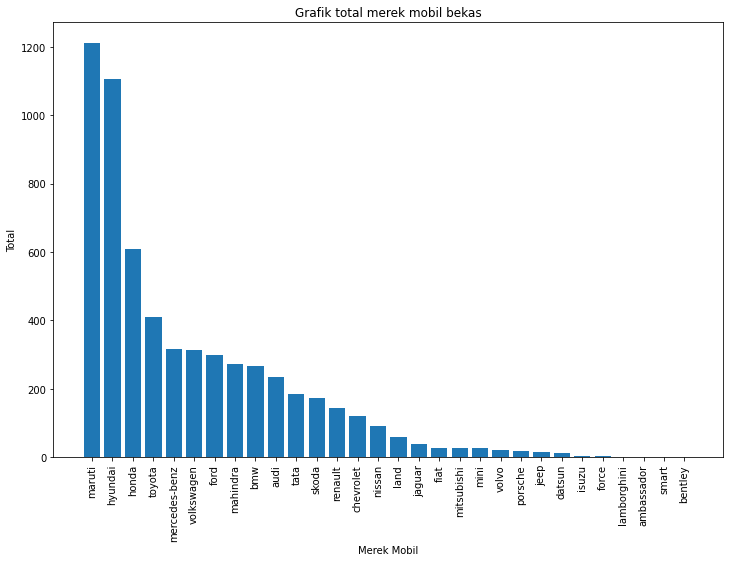

In [ ]:
# Grafik jumlah mobil bekas
import matplotlib.pyplot as plt

car_name = car_brand.value_counts().index
car_name_total = car_brand.value_counts().values

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(car_name, car_name_total)
ax.set_xticklabels(car_name, rotation=90)
ax.set_xlabel('Merek Mobil')
ax.set_ylabel('Total')
ax.set_title('Grafik total merek mobil bekas')
plt.show()

**Melihat jumlah mobil bekas di tiap-tiap kota**

Setelah menemukan merek/brand mobil terbanyak selanjutnya yang dapat di eksplor adalah jumlah mobil bekas di tiap tiap kota di India

In [ ]:
# Tampilkan data lokasi
df[['Name','Location']].head()

,Name,Location
0,Maruti Wagon R LXI CNG,Mumbai
1,Hyundai Creta 1.6 CRDi SX Option,Pune
2,Honda Jazz V,Chennai
3,Maruti Ertiga VDI,Chennai
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore


In [ ]:
# Ambil data Lokasi dari datset
nd_car = df.Location
nd_car.value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

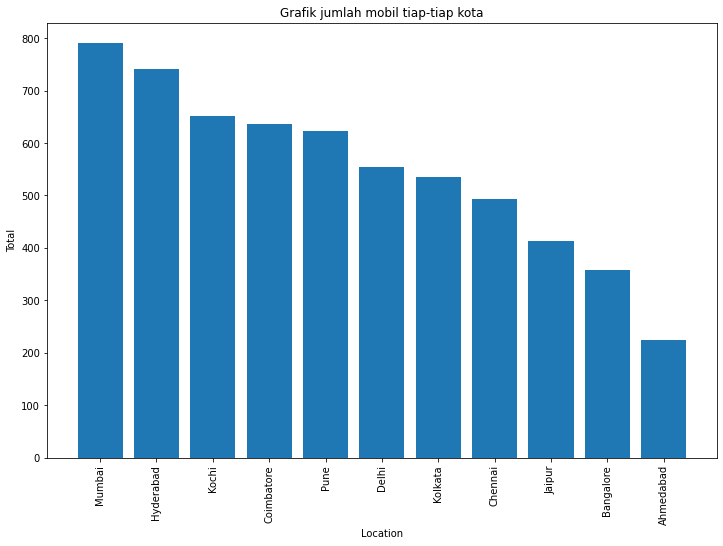

In [ ]:
# Grafik jumlah mobil tiap-tiap kota

location = nd_car.value_counts().index
location_total = nd_car.value_counts().values

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(location, location_total)
ax.set_xticklabels(location, rotation=90)
ax.set_xlabel('Location')
ax.set_ylabel('Total')
ax.set_title('Grafik jumlah mobil tiap-tiap kota')
plt.show()

### 3. Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut?

In [ ]:
second_car_year = second_car.Year
second_car_year_df = pd.DataFrame({'Year':second_car_year,'Total':1})
second_car_year_df_grouped = second_car_year_df.groupby(by=['Year']).sum()

second_car_year_df_grouped

,Total
Year,
1998,3
1999,1
2000,2
2001,6
2002,10
2003,12
2004,20
2005,27
2006,44


In [ ]:
second_car_year_df = pd.melt(second_car_year_df_grouped.reset_index(),id_vars='Year', value_name='Total')
second_car_year_df = second_car_year_df.drop(['variable'],axis=1)

second_car_year_df.head()

,Year,Total
0,1998,3
1,1999,1
2,2000,2
3,2001,6
4,2002,10


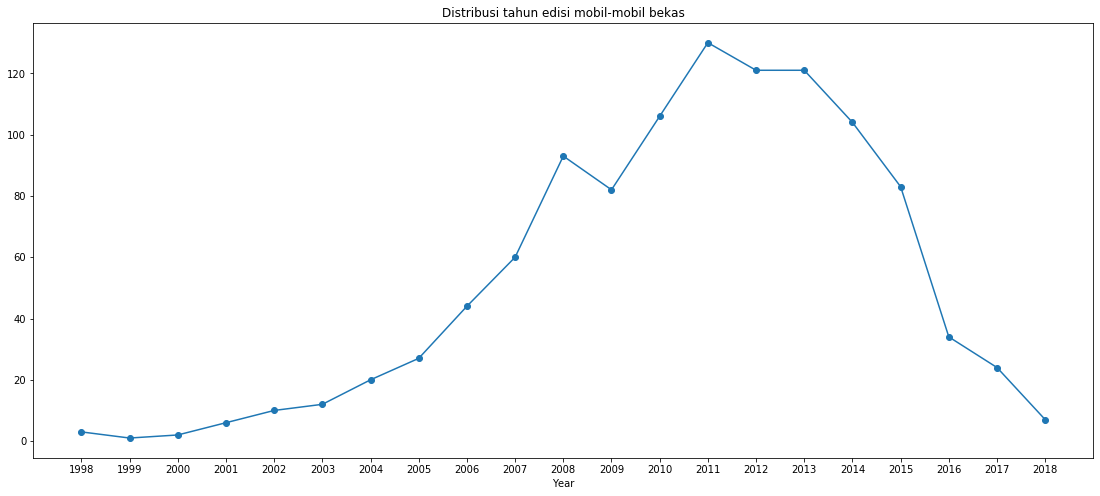

In [ ]:
import matplotlib.pyplot as plt

year_index = second_car_year_df.Year
year_index = year_index.tolist()

plt.figure(figsize=(19,8))
plt.plot(second_car_year_df['Year'],second_car_year_df['Total'],marker='o')
plt.xlabel('Year')
plt.title('Distribusi tahun edisi mobil-mobil bekas')
plt.xticks(year_index)
plt.show()

In [ ]:
data = df['Year'].value_counts()
data

2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
1998      4
2000      4
1999      2
Name: Year, dtype: int64

In [ ]:
# No 3 option 2
nd_car_year = df.Year
nd_car_year_df = pd.DataFrame({'Year':nd_car_year,'Total':1})
nd_car_year_df_grouped = nd_car_year_df.groupby(by=['Year']).sum()

nd_car_year_df_grouped.head()

,Total
Year,
1998,4
1999,2
2000,4
2001,8
2002,15


In [ ]:
nd_car_year_df = pd.melt(nd_car_year_df_grouped.reset_index(),id_vars='Year', value_name='Total')
nd_car_year_df = nd_car_year_df.drop(['variable'],axis=1)

nd_car_year_df.head()

,Year,Total
0,1998,4
1,1999,2
2,2000,4
3,2001,8
4,2002,15


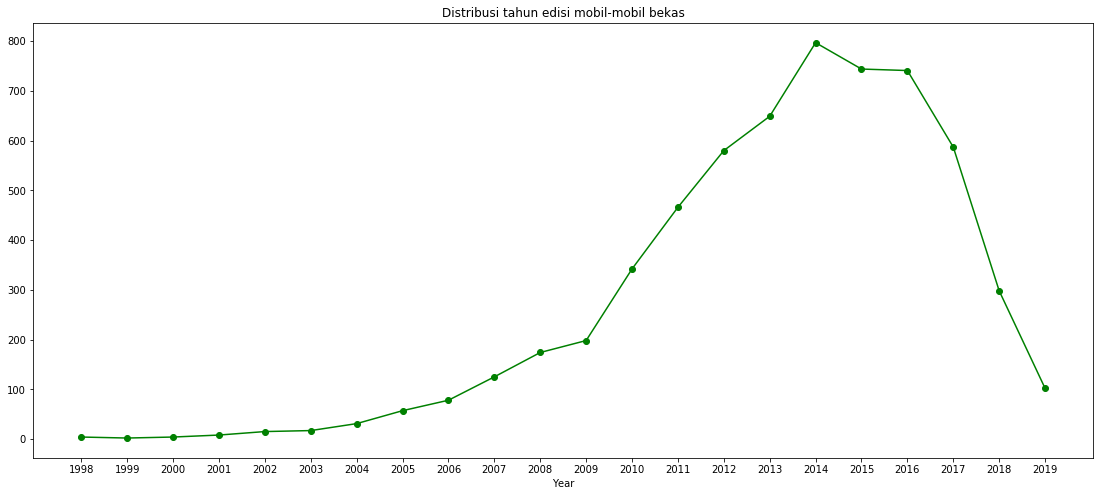

In [ ]:
nd_year_index = nd_car_year_df.Year
nd_year_index = nd_year_index.tolist()

plt.figure(figsize=(19,8))
plt.plot(nd_car_year_df['Year'],nd_car_year_df['Total'],'g-o')
plt.xlabel('Year')
plt.title('Distribusi tahun edisi mobil-mobil bekas')
plt.xticks(nd_year_index)
plt.show()

### 4. Berapa banyak mobil yang memiliki total jarak pemakaian di bawah 100.000 kilometer?

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
km_under_100k = df['Kilometers_Driven'] < 100000
print('Total : ', len(df[km_under_100k]))

Total :  5470


### 5. Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah atau tinggi? Sertakan argumen yang mendukung jawaban.

In [ ]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


### 6. Apakah terdapat outlier pada kolom Kilometers_Driven? Sertakan argumen yang mendukung jawaban.

In [ ]:
import numpy as np

km_driven = df.Kilometers_Driven
km_driven = km_driven.tolist()

outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score = (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [ ]:
outlier_datapoints = detect_outlier(km_driven)
print(outlier_datapoints)

[775000, 620000, 720000, 6500000, 480000, 480000, 445000]


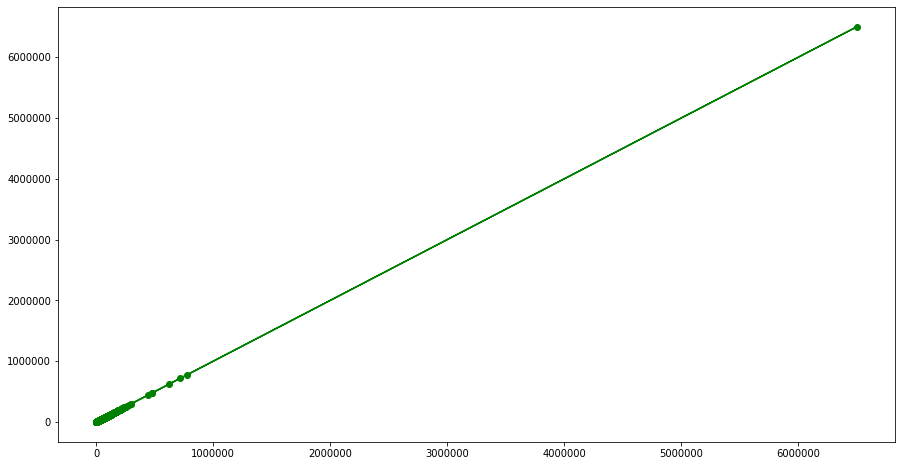

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df['Kilometers_Driven'],df['Kilometers_Driven'],'g-o')
plt.show()

### 7. Apakah tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian? Sertakan argumen yang mendukung jawaban.

In [ ]:
df.corr()

,Year,Kilometers_Driven,Seats,Price
Year,1.000000,-0.173048,0.012333,0.305327
Kilometers_Driven,-0.173048,1.000000,0.083113,-0.011493
Seats,0.012333,0.083113,1.000000,0.052225
Price,0.305327,-0.011493,0.052225,1.000000


### 8. Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih?

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
third_car_above = (df.Owner_Type != 'First') & (df.Owner_Type != 'Second')

In [ ]:
third_car_above = df[third_car_above]

In [ ]:
third_car_above.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.8 kmpl,2494 CC,102 bhp,7.0,4.00
54,Hyundai Grand i10 Sportz,Chennai,2015,54000,Petrol,Manual,Third,18.9 kmpl,1197 CC,82 bhp,5.0,3.60
77,Toyota Innova 2.0 G1,Chennai,2006,230000,Petrol,Manual,Third,12.4 kmpl,1998 CC,132 bhp,8.0,4.50
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,1.67
245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,0.95


In [ ]:
print('Total : ', len(third_car_above))

Total :  122


### 9. Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat?[

In [ ]:
a = '26.43 kmpl'

a.partition(' ')[-1]

'kmpl'

In [ ]:
mileage_unit = df.Mileage

In [ ]:
mileage_unit

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 6019, dtype: object

In [ ]:
mileage_unit = mileage_unit.str.partition(' ')[2]

In [ ]:
mileage_unit = mileage_unit.tolist()

In [ ]:
from collections import OrderedDict  
  
def group_list(lst): 
      
    res =  [(el, lst.count(el)) for el in lst] 
    return list(OrderedDict(res).items()) 

In [ ]:
lst = mileage_unit

In [ ]:
group_list(lst)

[('km/kg', 66), ('kmpl', 5951), (nan, 2)]

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
df.sort_values(by=['Mileage'], ascending=False).head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3580,Mercedes-Benz CLS-Class 2006-2010 350 CDI,Hyderabad,2010,29000,Diesel,Automatic,First,9.9 kmpl,3498 CC,271.72 bhp,4.0,32.00
1288,Audi TT 2.0 TFSI,Kochi,2014,14262,Petrol,Automatic,First,9.9 kmpl,1984 CC,207.8 bhp,2.0,27.35
557,Audi TT 2.0 TFSI,Delhi,2013,12100,Petrol,Automatic,First,9.9 kmpl,1984 CC,207.8 bhp,2.0,29.50
4001,Honda Accord 2.4 Inspire M/T,Mumbai,2012,42000,Petrol,Manual,First,9.8 kmpl,2354 CC,180 bhp,5.0,6.25
4519,Maruti Grand Vitara MT,Mumbai,2008,46810,Petrol,Manual,First,9.8 kmpl,1995 CC,163.5 bhp,5.0,3.95


In [ ]:
fuel_type = df.Fuel_Type
mileage = df.Mileage

mileage = mileage.str.partition(' ')[0]
mileage = mileage.astype('float')
mileage

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: 0, Length: 6019, dtype: float64

In [ ]:
fuel_type = fuel_type.tolist()
mileage = mileage.tolist()



AttributeError: 'list' object has no attribute 'tolist'

In [ ]:
fuel_mileage = pd.DataFrame({'Fuel_Type':fuel_type,'Mileage':mileage})

In [ ]:
fuel_mileage

,Fuel_Type,Mileage
0,CNG,26.60
1,Diesel,19.67
2,Petrol,18.20
3,Diesel,20.77
4,Diesel,15.20
...,...,...
6014,Diesel,28.40
6015,Diesel,24.40
6016,Diesel,14.00
6017,Petrol,18.90


In [ ]:
fuel_mileage.sort_values(by=['Mileage'], ascending=False)

,Fuel_Type,Mileage
2059,CNG,33.54
3129,CNG,33.54
2371,CNG,33.54
4141,CNG,33.54
1332,CNG,33.54
...,...,...
647,Petrol,0.00
1345,Petrol,0.00
2597,Petrol,0.00
4446,Electric,NaN


In [ ]:
fuel_mileage.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
loc_price = df.Location
price_loc = df.Price
loc_price = loc_price.tolist()
price_loc = price_loc.tolist()

In [ ]:
location_price = pd.DataFrame({'Location':loc_price,'Price':price_loc})

In [ ]:
location_price.head()

,Location,Price
0,Mumbai,1.75
1,Pune,12.50
2,Chennai,4.50
3,Chennai,6.00
4,Coimbatore,17.74


In [ ]:
location_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  6019 non-null   object 
 1   Price     6019 non-null   float64
dtypes: float64(1), object(1)
memory usage: 94.2+ KB


In [ ]:
location_price.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [ ]:
l_price = ['Hyderabad','Delhi','Kochi','Coimbatore','Bangalore','Ahmedabad','Mumbai','Kolkata',
           'Chennai','Pune','Jaipur']
min_price = [0.6,0.75,1.26,1.68,1.35,0.75,0.55,0.65,0.65,0.44,0.45]
max_price = [160,120,97.07,93.67,93,85,75,75,70,68,42.5]

In [ ]:
for i in l_price:
    print('price_',i)

price_ Mumbai
price_ Pune
price_ Chennai
price_ Coimbatore
price_ Hyderabad
price_ Jaipur
price_ Kochi
price_ Kolkata
price_ Delhi
price_ Bangalore
price_ Ahmedabad


In [ ]:
price_Mumbai = location_price.Location == 'Mumbai'
price_Pune = location_price.Location == 'Pune'
price_Chennai = location_price.Location == 'Chennai'
price_Coimbatore = location_price.Location == 'Coimbatore'
price_Hyderabad = location_price.Location == 'Hyderabad'
price_Jaipur = location_price.Location == 'Jaipur'
price_Kochi = location_price.Location == 'Kochi'
price_Kolkata = location_price.Location == 'Kolkata'
price_Delhi = location_price.Location == 'Delhi'
price_Bangalore = location_price.Location == 'Bangalore'
price_Ahmedabad = location_price.Location == 'Ahmedabad'

price_Mumbai = location_price[price_Mumbai]
price_Pune = location_price[price_Pune]
price_Chennai = location_price[price_Chennai]
price_Coimbatore = location_price[price_Coimbatore]
price_Hyderabad = location_price[price_Hyderabad]
price_Jaipur = location_price[price_Jaipur]
price_Kochi = location_price[price_Kochi]
price_Kolkata = location_price[price_Kolkata]
price_Delhi = location_price[price_Delhi]
price_Bangalore = location_price[price_Bangalore]
price_Ahmedabad = location_price[price_Ahmedabad]

In [ ]:
# print(price_Jaipur.min())
print(price_Chennai.max())

Location    Chennai
Price            70
dtype: object


In [ ]:
max_min_price = pd.DataFrame({'Location':l_price,'Maximum_Price':max_price,'Minimum_Price':min_price})
max_min_price

,Location,Maximum_Price,Minimum_Price
0,Hyderabad,160.00,0.60
1,Delhi,120.00,0.75
2,Kochi,97.07,1.26
3,Coimbatore,93.67,1.68
4,Bangalore,93.00,1.35
5,Ahmedabad,85.00,0.75
6,Mumbai,75.00,0.55
7,Kolkata,75.00,0.65
8,Chennai,70.00,0.65
9,Pune,68.00,0.44


In [ ]:
fuel_cng = fuel_mileage['Fuel_Type'] == 'CNG'
fuel_diesel = fuel_mileage.Fuel_Type == 'Diesel'
fuel_petrol = fuel_mileage.Fuel_Type == 'Petrol'
fuel_lpg = fuel_mileage.Fuel_Type == 'LPG'
fuel_electric = fuel_mileage.Fuel_Type == 'Electric'

In [ ]:
fuel_cng = fuel_mileage[fuel_cng]
fuel_diesel = fuel_mileage[fuel_diesel]
fuel_petrol = fuel_mileage[fuel_petrol]
fuel_lpg = fuel_mileage[fuel_lpg]
fuel_electric = fuel_mileage[fuel_electric]

In [ ]:
print(fuel_cng.max())
print(fuel_diesel.max())
print(fuel_petrol.max())
print(fuel_lpg.max())
print(fuel_electric.max())

Fuel_Type      CNG
Mileage      33.54
dtype: object
Fuel_Type    Diesel
Mileage        28.4
dtype: object
Fuel_Type    Petrol
Mileage          26
dtype: object
Fuel_Type     LPG
Mileage      26.2
dtype: object
Fuel_Type    Electric
Mileage          None
dtype: object


In [ ]:
fuel_comp_df = pd.DataFrame({'Fuel_Type':['CNG','Diesel','Petrol','LPG','Electric']
                            ,'Mileage':[33.54,28.4,26,26.2,'None']})

fuel_comp_df1 = pd.DataFrame({'Fuel_Type':['CNG','Diesel','Petrol','LPG','Electric']
                            ,'Mileage':[33.54,28.4,26,26.2,0]})

In [ ]:
fuel_comp_df

,Fuel_Type,Mileage
0,CNG,33.54
1,Diesel,28.4
2,Petrol,26
3,LPG,26.2
4,Electric,None


In [ ]:
ft = fuel_comp_df1.Fuel_Type
ml = fuel_comp_df1.Mileage

fig, ax = plt.subplots()
ax.bar(ft,ml)
ax.set

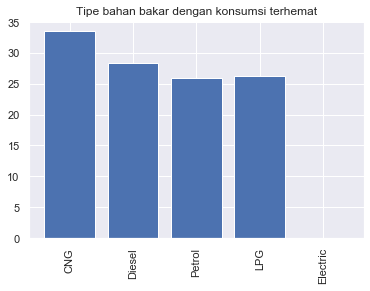

In [ ]:
ft = fuel_comp_df1.Fuel_Type
ml = fuel_comp_df1.Mileage

fig, ax = plt.subplots()
ax.bar(ft,ml)
ax.set_title('Tipe bahan bakar dengan konsumsi terhemat')
ax.set_xticklabels(ft, rotation=90)
plt.show()

In [ ]:
df.iloc[2059]

Name                 Maruti Wagon R CNG LXI
Location                             Mumbai
Year                                   2013
Kilometers_Driven                     54000
Fuel_Type                               CNG
Transmission                         Manual
Owner_Type                            First
Mileage                         33.54 km/kg
Engine                               998 CC
Power                             67.04 bhp
Seats                                     5
Price                                  3.05
Name: 2059, dtype: object

### 10. Apa saja faktor-faktor yang mempengaruhi harga mobil bekas di India? Sertakan argumen yang mendukung jawaban.

In [ ]:
df.corr()

,Year,Kilometers_Driven,Seats,Price
Year,1.000000,-0.173048,0.012333,0.305327
Kilometers_Driven,-0.173048,1.000000,0.083113,-0.011493
Seats,0.012333,0.083113,1.000000,0.052225
Price,0.305327,-0.011493,0.052225,1.000000


### New Insights

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
loc_trans = df[['Location','Transmission']]

In [ ]:
loc_trans.isnull().sum()

Location        0
Transmission    0
dtype: int64

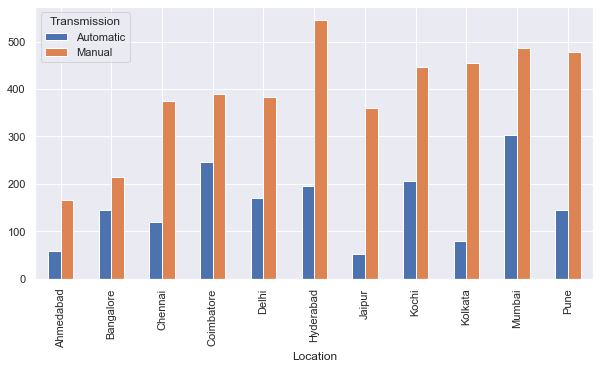

In [ ]:
# Grafik transmisi mobil tiap-tiap kota
loc_trans.groupby(by=['Location','Transmission']).size().unstack(level=1).plot(kind='bar',figsize=(10,5))

In [ ]:
loc_trans = loc_trans.groupby(by=['Location','Transmission']).size()

In [ ]:
type(loc_trans)

pandas.core.series.Series

In [ ]:
loc_trans_df = loc_trans.to_frame()
loc_trans_df

0
Location   Transmission     
Ahmedabad  Automatic      58
           Manual        166
Bangalore  Automatic     144
           Manual        214
Chennai    Automatic     120
           Manual        374
Coimbatore Automatic     247
           Manual        389
Delhi      Automatic     171
           Manual        383
Hyderabad  Automatic     196
           Manual        546
Jaipur     Automatic      52
           Manual        361
Kochi      Automatic     205
           Manual        446
Kolkata    Automatic      80
           Manual        455
Mumbai     Automatic     303
           Manual        487
Pune       Automatic     144
           Manual        478

In [ ]:
loc_trans_df = loc_trans_df.rename(columns={0:'Total'})

In [ ]:
loc_trans_df

Total
Location   Transmission       
Ahmedabad  Automatic        58
           Manual          166
Bangalore  Automatic       144
           Manual          214
Chennai    Automatic       120
           Manual          374
Coimbatore Automatic       247
           Manual          389
Delhi      Automatic       171
           Manual          383
Hyderabad  Automatic       196
           Manual          546
Jaipur     Automatic        52
           Manual          361
Kochi      Automatic       205
           Manual          446
Kolkata    Automatic        80
           Manual          455
Mumbai     Automatic       303
           Manual          487
Pune       Automatic       144
           Manual          478

In [ ]:
# Jumlah transmisi terbanyak dan tersedikit tiap tiap kota
loc_trans_df.sort_values(by='Total')

,,Total
Location,Transmission,
Jaipur,Automatic,52
Ahmedabad,Automatic,58
Kolkata,Automatic,80
Chennai,Automatic,120
Bangalore,Automatic,144
Pune,Automatic,144
Ahmedabad,Manual,166
Delhi,Automatic,171
Hyderabad,Automatic,196


In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
owner_type = df.Owner_Type
owner_type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

(0, 160)

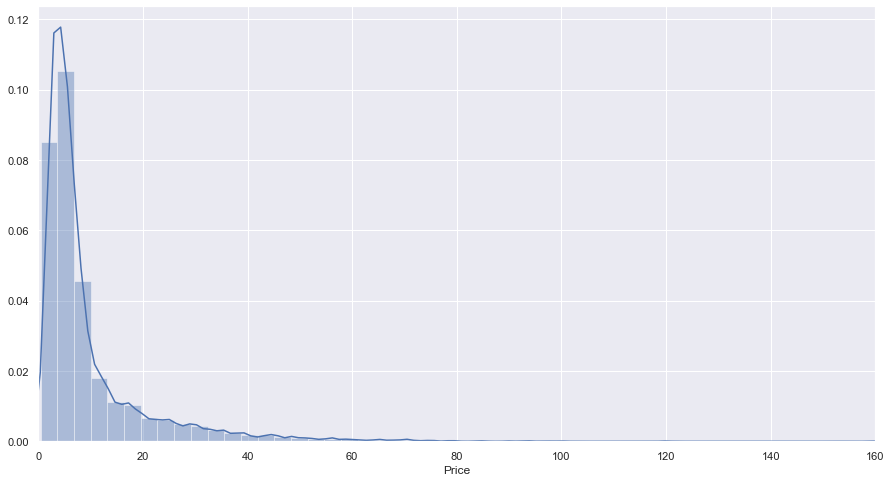

In [ ]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(df['Price'])
plt.xlim([0,160])

In [ ]:
nd_car_year_df

,Year,Total
0,1998,4
1,1999,2
2,2000,4
3,2001,8
4,2002,15
5,2003,17
6,2004,31
7,2005,57
8,2006,78
9,2007,125


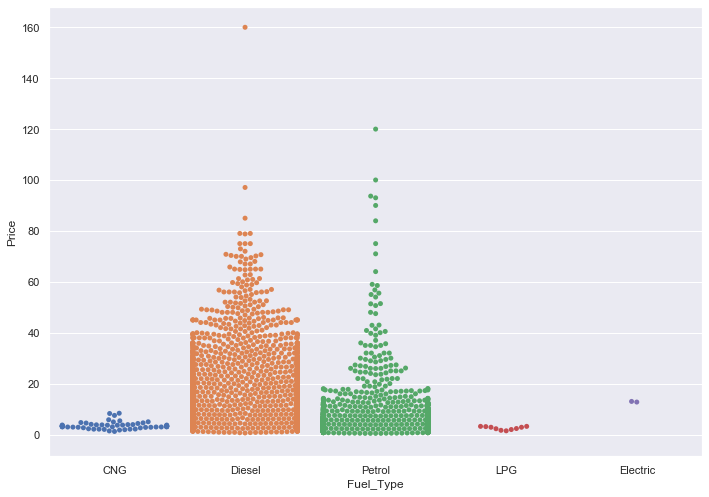

In [ ]:
# Persebaran Jenis Bahan Bakar dan Harga tiap-tiap mobil
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = 'Fuel_Type', y ='Price', data = df)

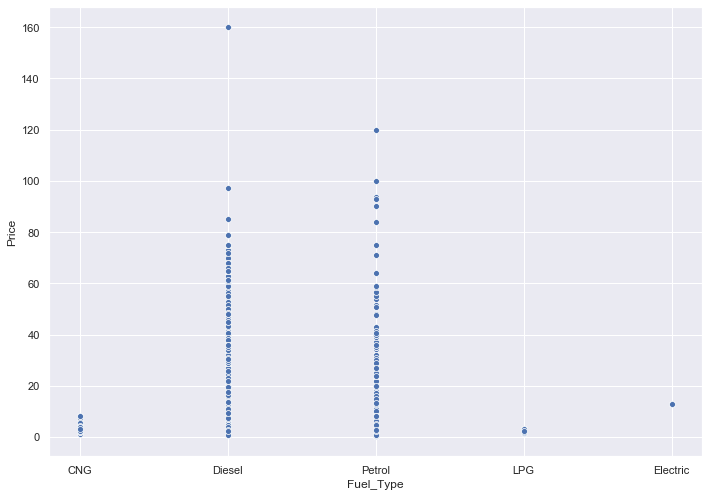

In [ ]:
var = 'Fuel_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(x = var, y ='Price', data = df)

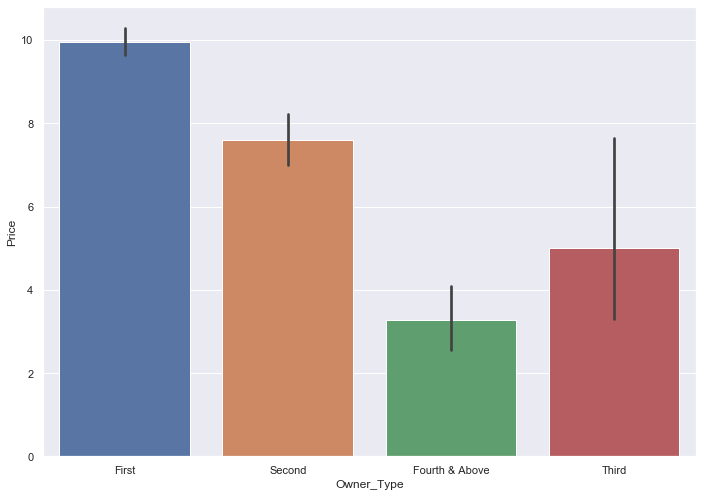

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(x = 'Owner_Type', y ='Price', data = df) 

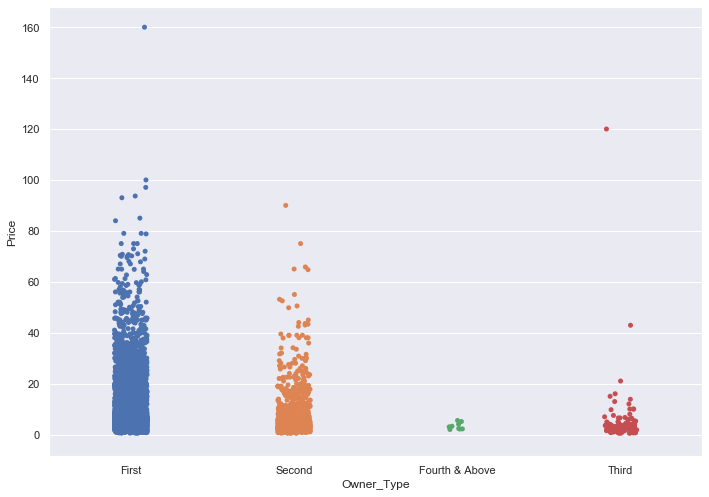

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = 'Owner_Type', y ='Price', data = df) 

In [ ]:
# New Insights
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


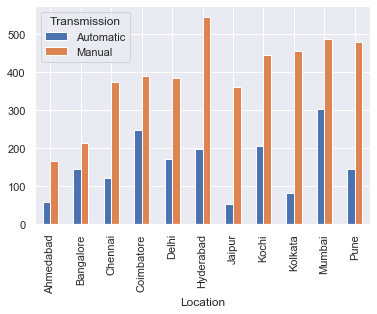

In [ ]:
# Jumlah transmisi mobil tiap-tiap kota
loc_trans.groupby(by=['Location','Transmission']).size().unstack(level=1).plot(kind='bar')

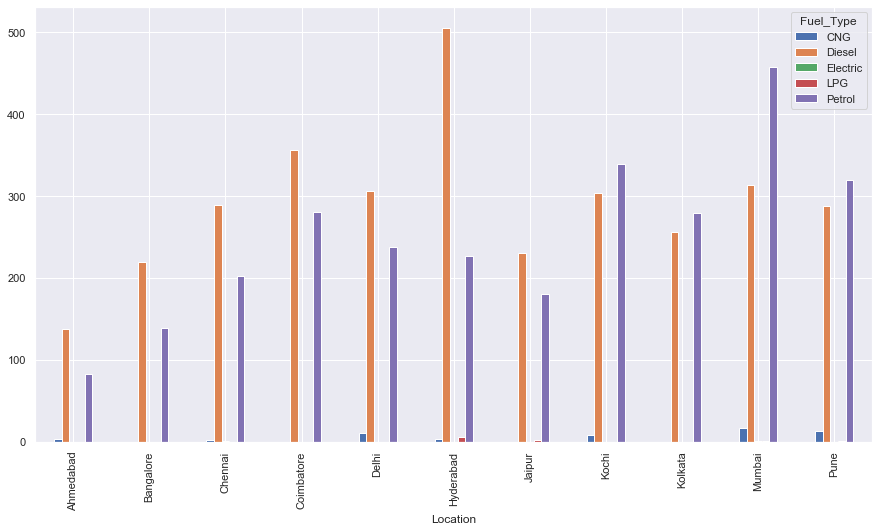

In [ ]:
df.groupby(by=['Location','Fuel_Type']).size().unstack(level=1).plot(kind='bar',figsize=(15,8))

In [ ]:
loc_power = df[['Location','Power']]

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,NaN,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,NaN,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,NaN,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,NaN,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,NaN,5.0,17.74


In [ ]:
loc = df.Location
power = df.Power

In [ ]:
power = power.str.partition(' ')[0]

In [ ]:
loc = loc.tolist()
power = power.tolist()

In [ ]:
loc_power = pd.DataFrame({'Location':loc,'Power':power})

In [ ]:
loc_power.head()

,Location,Power
0,Mumbai,58.16
1,Pune,126.2
2,Chennai,88.7
3,Chennai,88.76
4,Coimbatore,140.8


In [ ]:
loc_power.isnull().sum()

Location     0
Power       36
dtype: int64

In [ ]:
loc_power = loc_power.dropna()

In [ ]:
loc_power.isnull().sum()

Location    0
Power       0
dtype: int64

In [ ]:
loc_power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5983 entries, 0 to 6018
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  5983 non-null   object
 1   Power     5983 non-null   object
dtypes: object(2)
memory usage: 140.2+ KB


In [ ]:
loc_power['Power'] = pd.to_numeric(loc_power['Power'], errors='coerce')

In [ ]:
loc_power.head()

,Location,Power
0,Mumbai,58.16
1,Pune,126.20
2,Chennai,88.70
3,Chennai,88.76
4,Coimbatore,140.80


In [ ]:
loc_power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5983 entries, 0 to 6018
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  5983 non-null   object 
 1   Power     5876 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.2+ KB


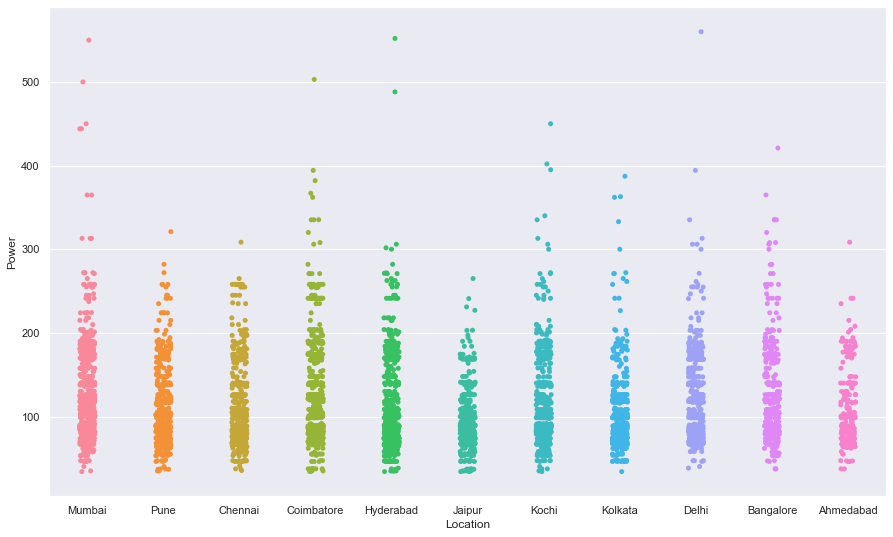

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
sns.stripplot(x = 'Location', y ='Power', data = loc_power) 

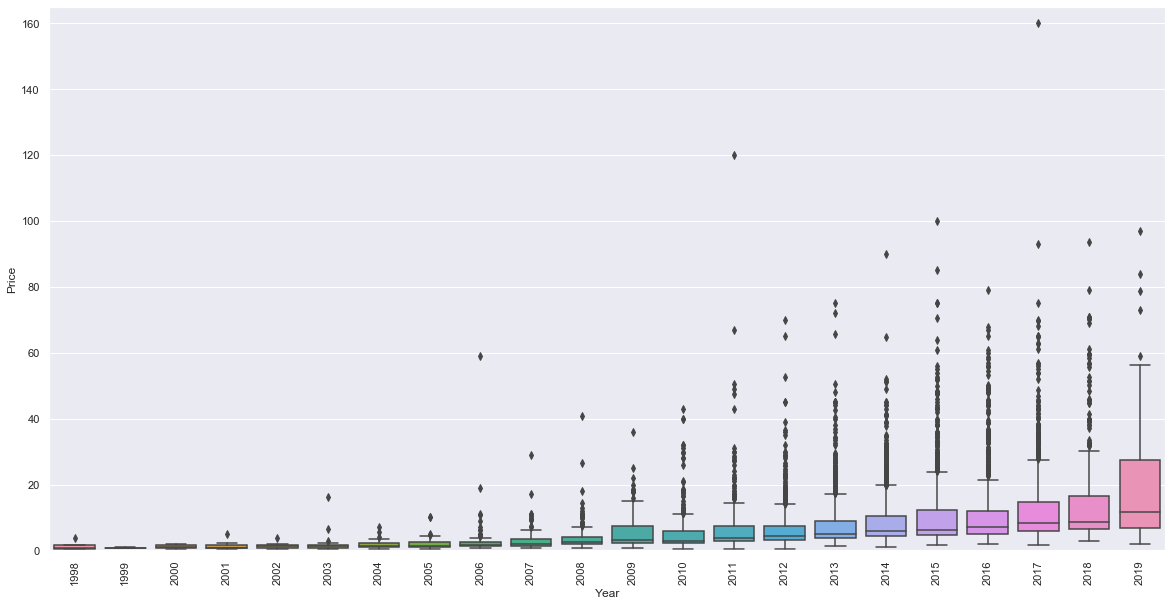

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x='Year', y='Price', data=df)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

<function matplotlib.pyplot.show(*args, **kw)>

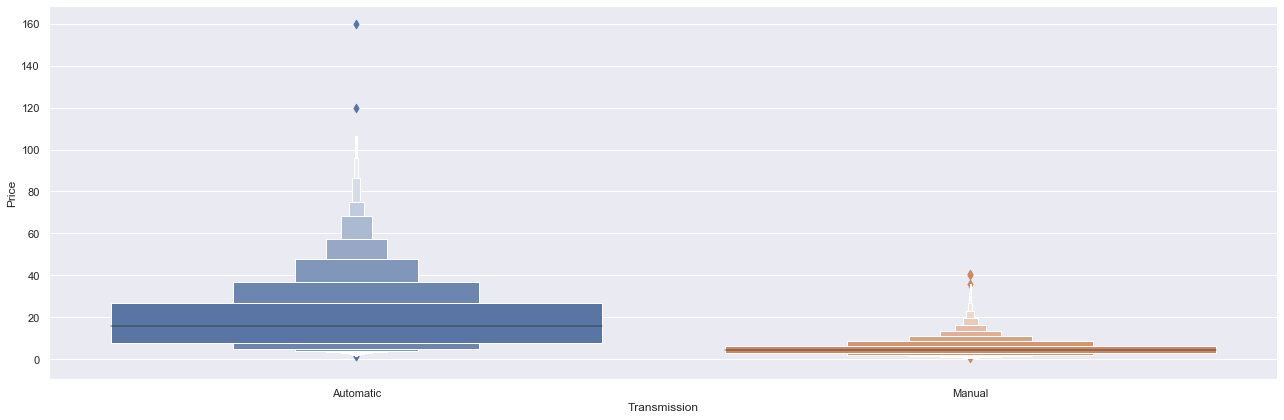

In [ ]:
sns.catplot(y='Price',x='Transmission',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

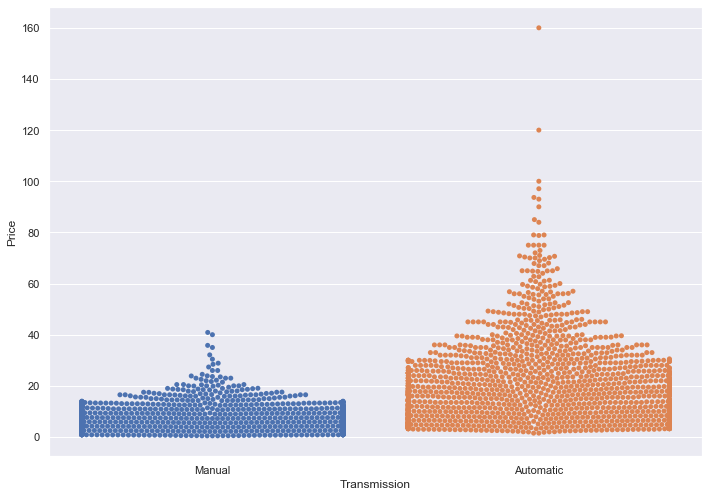

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x='Transmission',y='Price', data = df)

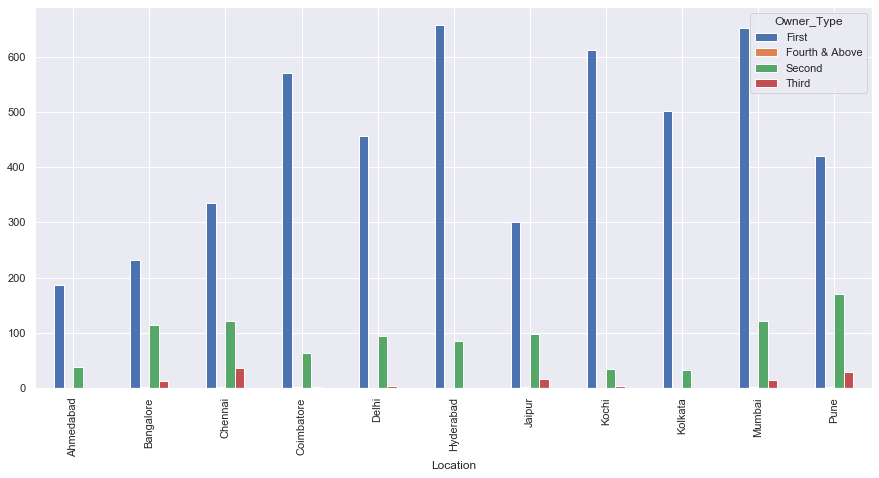

In [ ]:
df.groupby(by=['Location','Owner_Type']).size().unstack(level=1).plot(kind='bar',figsize=(15,7))

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


<function matplotlib.pyplot.show(*args, **kw)>

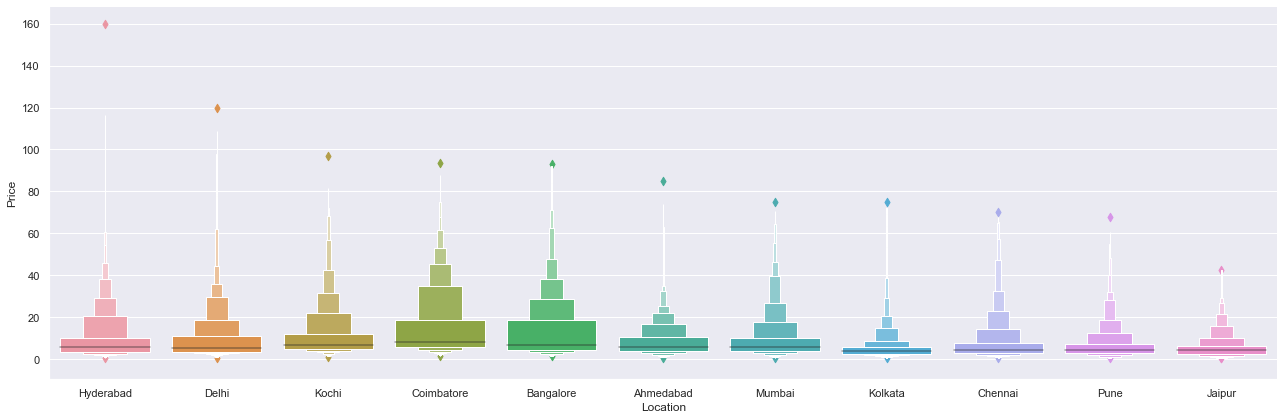

In [ ]:
sns.catplot(y='Price',x='Location',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

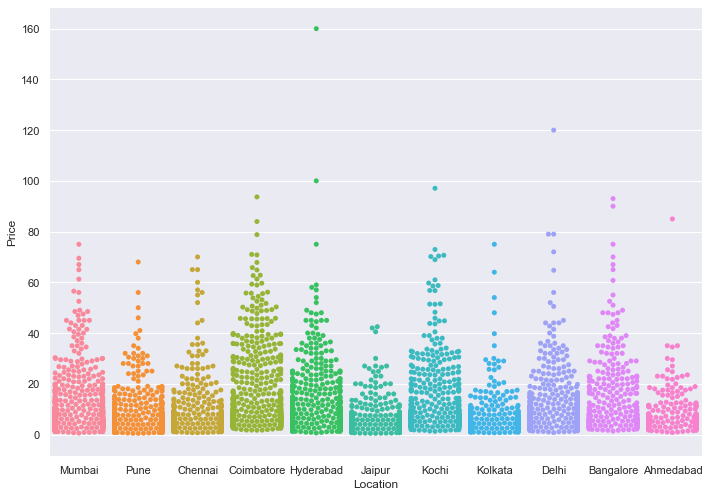

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x='Location',y='Price', data = df)

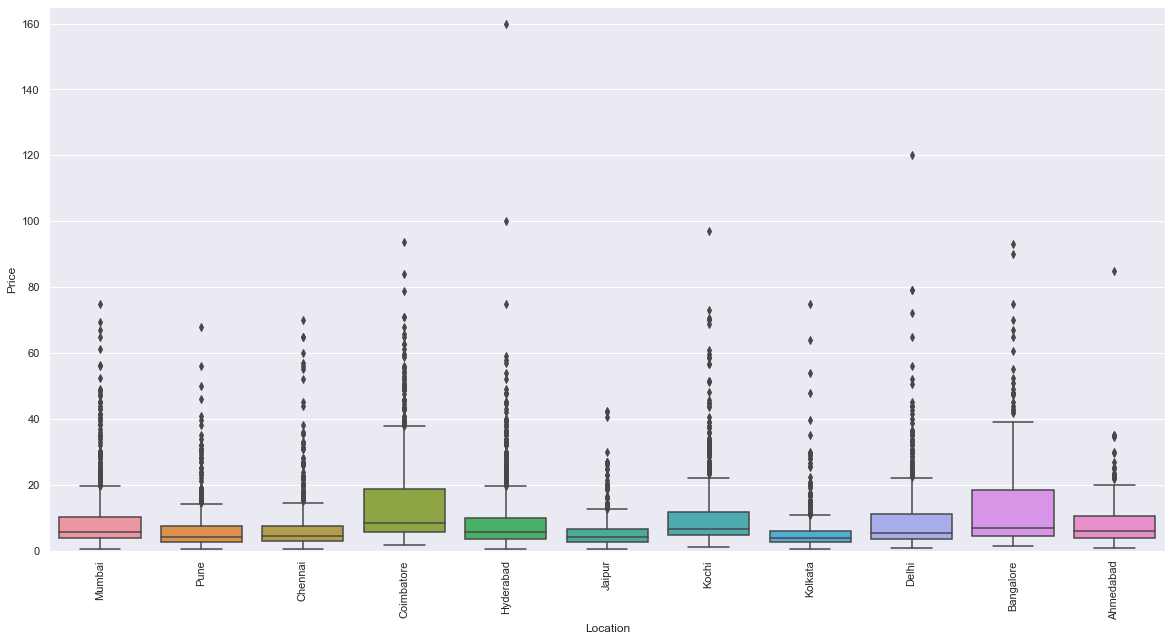

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x='Location', y='Price', data=df)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);